In [ ]:
import pandas as pd
import polars as pl

import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns

import process as pp
import db_connect

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
all_query = "SELECT * FROM rolling_sales;"
connection = db_connect.start_conn()
all_03_23 = db_connect.pull_db_as_pl(all_query, connection)

# Data Visualization

C:\Users\yangt\AppData\Local\Temp\ipykernel_25920\3051648604.py:13: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  axs[0] = sns.lineplot(
c:\Coding\Projects\Data Practice\NYC Rolling Sales\NYCprop_py312_env\Lib\site-packages\seaborn\_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)
C:\Users\yangt\AppData\Local\Temp\ipykernel_25920\3051648604.py:41: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  axs[1] = sns.barplot(


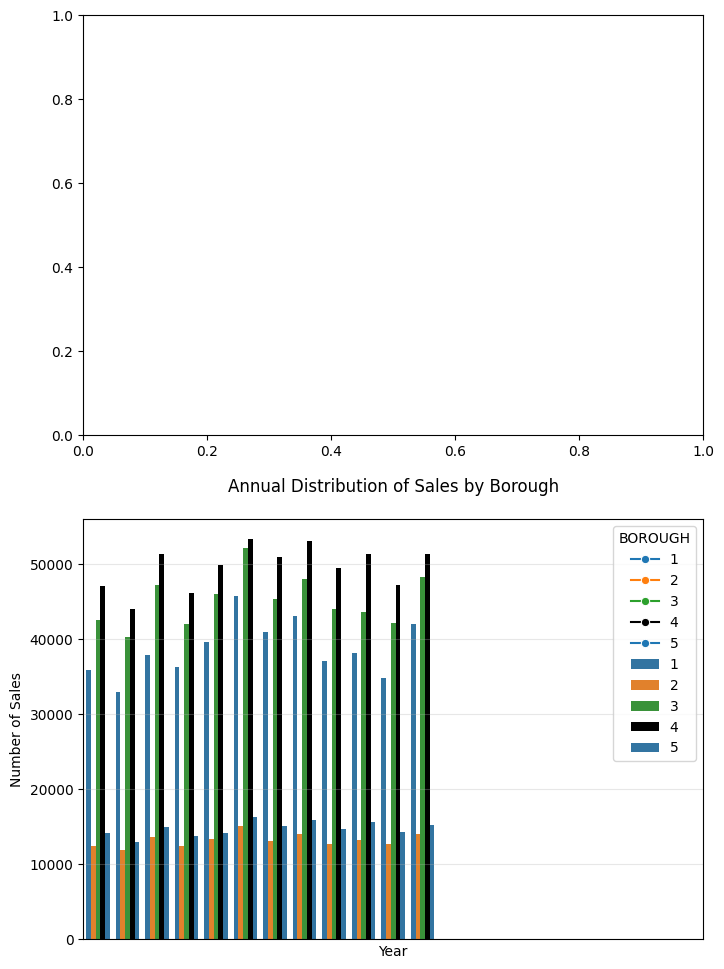

In [ ]:
query1 = """
SELECT EXTRACT(YEAR FROM "SALE DATE") as year, 
       "BOROUGH",
       COUNT(*) as count
FROM rolling_sales
GROUP BY EXTRACT(YEAR FROM "SALE DATE"), "BOROUGH"
ORDER BY year, "BOROUGH"
"""
annual_byBoro = pl.read_database(query = query1, connection = connection)

fig, axs = plt.subplots(2,1)

sns.lineplot(
    data=annual_byBoro.to_pandas(),
    x='year',
    y='count',
    hue='BOROUGH',
    palette=["C0", "C1", "C2", "k"],
    marker='o',
    ax=axs[0]
)

axs[0].set_title('Annual Distribution of Sales by Borough', pad=20)
axs[0].set_xlabel('Year')
axs[0].set_xticks(annual_byBoro['year'].unique().sort())
axs[0].set_xticklabels(annual_byBoro['year'].unique().sort(), rotation=45)
axs[0].set_ylabel('Number of Sales')
axs[0].grid(True, alpha=0.3)
axs[0].legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')

query2 = """
SELECT EXTRACT(MONTH FROM "SALE DATE") as month,
    "BOROUGH",
    COUNT(*) as count
FROM rolling_sales
GROUP BY EXTRACT(MONTH FROM "SALE DATE"), "BOROUGH"
ORDER BY month, "BOROUGH"
"""

monthly_byBoro = pl.read_database(query = query2, connection = connection)

axs[1] = sns.barplot(
    data=monthly_byBoro.to_pandas(),
    x='month',
    y='count',
    hue='BOROUGH',
    palette=["C0", "C1", "C2", "k"],
)



# Adjust layout to prevent label cutoff
# plt.tight_layout()
fig.set_figheight(12)
fig.set_figwidth(8)

In [78]:
annual_byBoro['year'].unique()

year
"decimal[*,0]"
2003
2004
2005
2006
2007
…
2019
2020
2021


In [64]:
test_df = pl.DataFrame(test, strict = False)
test_df

column_0,column_1,column_2,column_3,column_4
str,str,str,str,str
"""2""","""2""","""2""","""2""","""2"""
"""BATHGATE""","""BATHGATE""","""BATHGATE""","""BATHGATE""","""BATHGATE"""
"""01 ONE FAMILY HOMES""","""01 ONE FAMILY HOMES""","""01 ONE FAMILY HOMES""","""01 ONE FAMILY HOMES""","""01 ONE FAMILY HOMES"""
"""1""","""1""","""1""","""1""","""1"""
"""3035""","""3046""","""3046""","""3048""","""3048"""
…,…,…,…,…
"""1899""","""1899""","""1899""","""1901""","""1901"""
"""1""","""1""","""1""","""1""","""1"""
"""A9""","""A1""","""A1""","""A5""","""A1"""
